<a href="https://colab.research.google.com/github/ashisaxena710/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Ashi_Individual_Colab_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

> **Netflix Movies and TV Shows Clustering**





# **Problem Statement**


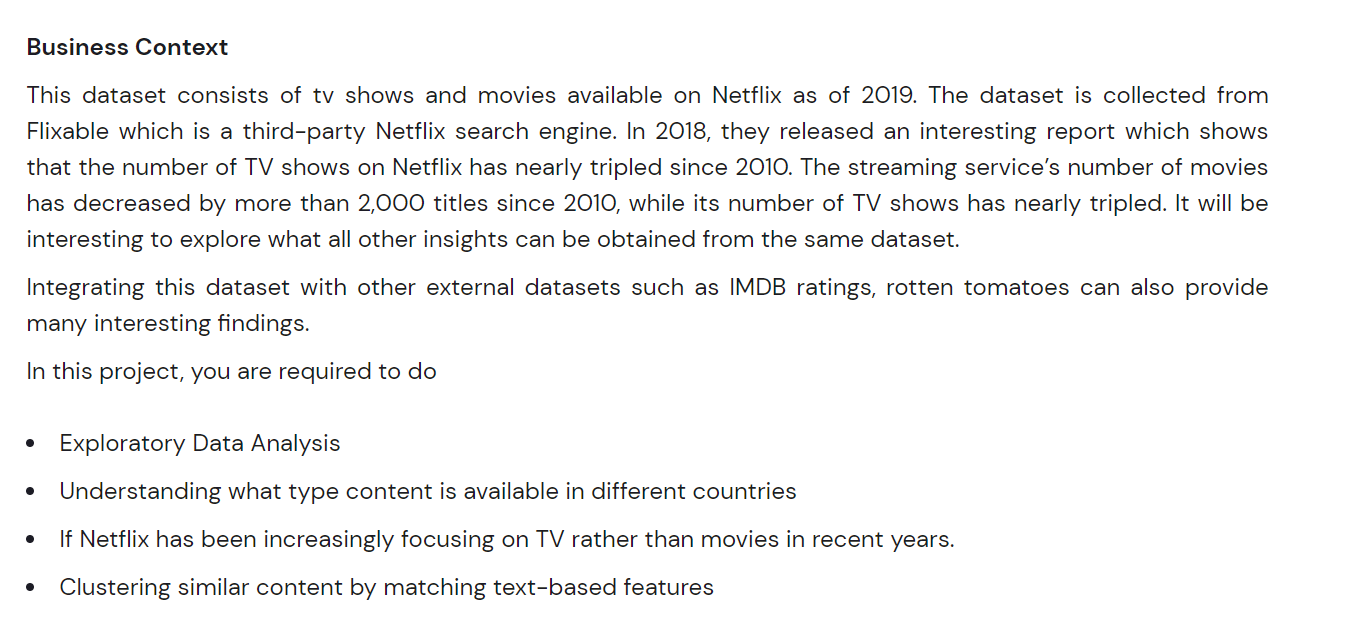

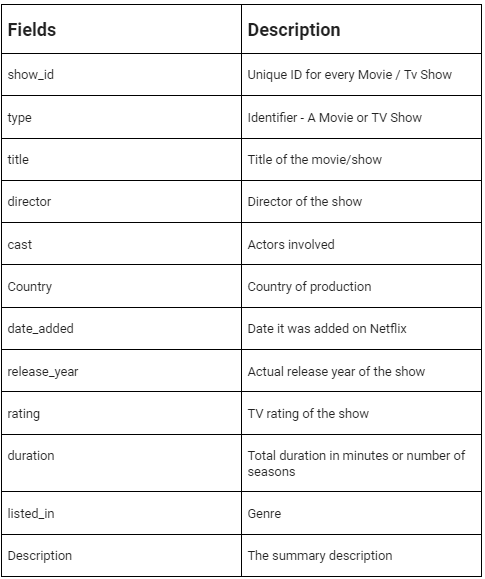

In [49]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [51]:
# Checking the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [52]:
# Number of rows and columns of the dataset
print(f'This dataset contain {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset contain 7787 rows and 12 columns.


In [53]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


All columns of this datatype are of object datatype except 'release_year' which is of int datatype.

In [54]:
# Duplicate Value Counts
df.duplicated().sum()

0

There are no duplicate value in the dataset.

In [55]:
# Missing values and Null Values
print("Null value count in each varaible")
print(f'{df.isna().sum()}')

Null value count in each varaible
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


There are many missing values in director, cast and country columns whereas date_added and rating columns have rare null values.

*   The missing values in director, cast and country column can be replaced with 'Unknown'.
*   The missing values in date_added and rating columns can be replaced with mode.



In [56]:
# Handling missing values
df[['director','cast']]=df[['director','cast']].fillna("Unknown")
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])

In [57]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values.

###**EDA**

Movie      5377
TV Show    2410
Name: type, dtype: int64
--------------------------------------------------


<AxesSubplot:xlabel='type', ylabel='count'>

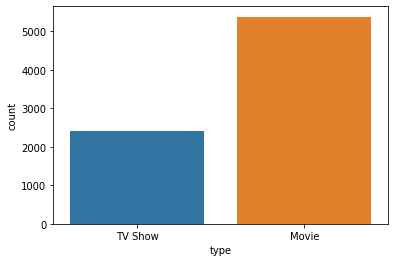

In [58]:
# Type
print(df['type'].value_counts())
print("-"*50)
sns.countplot(x='type',data=df)

In [59]:
# Title
df['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [60]:
# Director
df['director'].value_counts()

Unknown                   2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Andrew C. Erin               1
Vibhu Virender Puri          1
Lucien Jean-Baptiste         1
Jason Krawczyk               1
Sam Dunn                     1
Name: director, Length: 4050, dtype: int64

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

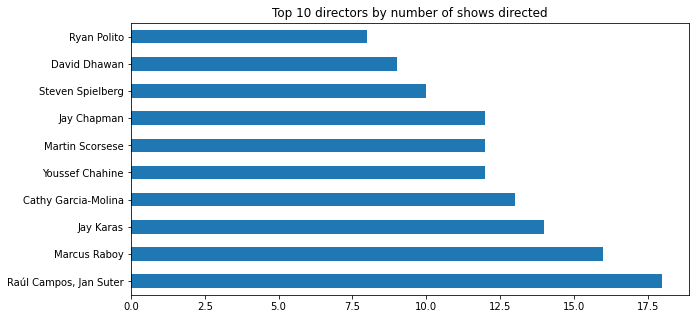

In [61]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.


In [62]:
# cast

In [63]:
# country
df['country'].value_counts()

United States                                                   3062
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

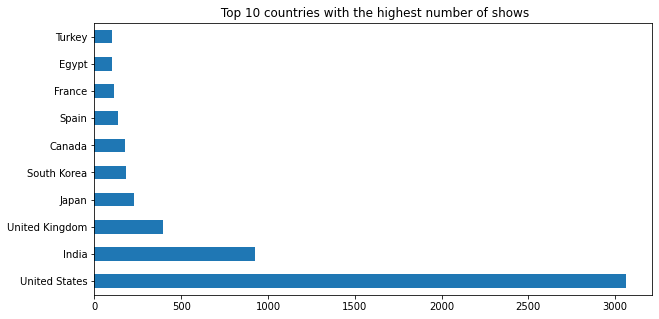

In [73]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows') 

In [64]:
# date_added
df['date_added'].value_counts()

January 1, 2020      128
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [65]:
# release_year
df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

<AxesSubplot:xlabel='count', ylabel='release_year'>

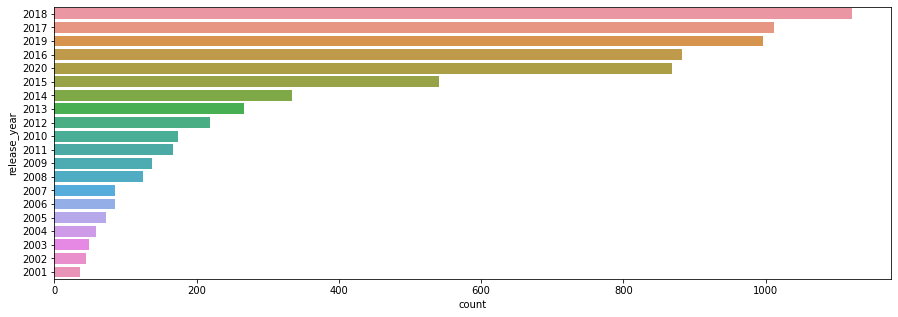

In [66]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=df['release_year'],data=df,order=df['release_year'].value_counts().index[0:20])

In [67]:
# rating
df['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

**TV-MA**: For Mature Audiences. This rating is intended for adults and may contain explicit content, graphic violence, or strong sexual content.

**TV-14**: For Ages 14 and Up. This rating may contain intense violence, suggestive dialogue, or coarse language.

**TV-PG**: Parental Guidance Suggested. This rating suggests that parents may want to watch with younger children due to mild violence or suggestive content.

**R**: Restricted. This rating indicates that the content is not suitable for children under 17 and may contain adult themes, strong language, and violence.

**PG-13**: Parental Guidance Suggested for Children Under 13. This rating may contain intense violence, sexual content, or strong language.

**TV-Y**: For All Children. This rating is intended for very young children and contains only mild, child-friendly content.

**TV-Y7**: For Ages 7 and Up. This rating may contain mild fantasy violence or some suggestive content.

**PG**: Parental Guidance Suggested. This rating suggests that parents may want to watch with younger children due to mild violence or suggestive content.

**TV-G**: For General Audiences. This rating indicates that the content is suitable for all ages.

**NR**: Not Rated. This rating is given to content that has not been rated by the MPAA or the TV rating system.

**G**: General Audiences. This rating indicates that the content is suitable for all ages.

**TV-Y7-FV**: For Ages 7 and Up with Fantasy Violence. This rating may contain mild fantasy violence or some suggestive content.

**UR**: Unrated. This rating is given to content that has not been rated by the MPAA or the TV rating system.

**NC-17**: No One 17 and Under Admitted. This rating indicates that the content is not suitable for children under 17 and may contain explicit content, graphic violence, or strong sexual content.




We can see that in rating columns there are many categories and there are categories which resemble one another. So we will create 5 categories of rating as follows :

1. Mature Content : 'TV-MA' , 'R' , 'NC-17'

2. Teen and Adult Content : 'TV-14' , 'PG-13' 

3. Family-Friendly Content : 'TV-PG' , 'PG' , 'TV-G' , 'G'

4. Children's Content : 'TV-Y' , 'TV-Y7' , 'TV-Y7-FV'

5. Unrated or Not Applicable : 'NR' , 'UR'

<AxesSubplot:xlabel='rating', ylabel='count'>

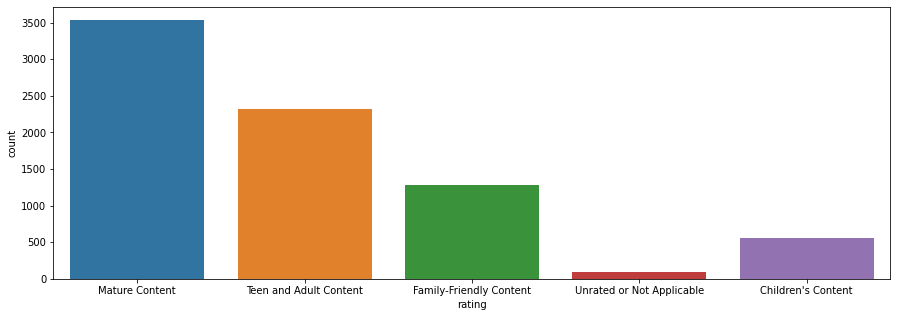

In [68]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Mature Content',
              'R':'Mature Content',
              'PG-13':'Teen and Adult Content',
              'TV-14':'Teen and Adult Content',
              'TV-PG':'Family-Friendly Content',
              'NR':'Unrated or Not Applicable',
              'TV-G':'Family-Friendly Content',
              'TV-Y':"Children's Content",
              'TV-Y7':"Children's Content",
              'PG':'Family-Friendly Content',
              'G':'Family-Friendly Content',
              'NC-17':"Children's Content",
              'TV-Y7-FV':"Children's Content",
              'UR':'Unrated or Not Applicable'}

df['rating'].replace(rating_map, inplace = True)

# Age ratings for shows in the dataset
plt.figure(figsize=(15,5))
sns.countplot(x='rating',data=df)

In [69]:
# duration
df['duration'].value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [70]:
# listed_in
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [71]:
# # Create a new dataframe to hold the separated values
# new_df = pd.DataFrame(columns=df.columns)

# # Loop through each row in the original dataframe
# for index, row in df.iterrows():
#     # Split the "listed_in" values into a list
#     listed_in_list = []
#     if "&" in row['listed_in']:
#         listed_in_list = row['listed_in'].split(' & ')
#     elif "," in row['listed_in']:
#         listed_in_list = row['listed_in'].split(', ')
#     else:
#         listed_in_list = [row['listed_in']]
#     # Loop through each value in the list and add a new row to the new dataframe
#     for listed_in_value in listed_in_list:
#         new_row = row.copy()
#         new_row['listed_in'] = listed_in_value
#         new_df = new_df.append(new_row)

# # Reset the index of the new dataframe
# new_df = new_df.reset_index(drop=True)

In [72]:
# description
df['description'].value_counts()

Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                3
When Elastigirl gets recruited for a high-profile crime-fighting mission, Mr. Incredible takes on his toughest assignment ever: full-time parenting.        2
A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.                 2
When pretty new neighbor Seema falls for their shy roommate Sid, jealous womanizers Omi and Jai plot to break up the new lovebirds.                         2
                                                                                                                                                           ..
Researchers add context and clarity to UFO mysteries